<a href="https://colab.research.google.com/github/JoungMinJu/machine_learning/blob/main/6%EC%9E%A5/%EC%A3%BC%EC%84%B1%EB%B6%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

차원과 차원축소


: 과일사진은 10,000개의 픽셀이 있어서 10,000개의 특성이 있는 셈. 이런 특성을 차원이라고도 부른다.
이때 이 차원을 줄일 수 있다면 저장공간을 크게 절약할 수 있을 것이다.

이를 위해 비지도 학습 작업 중 하나인 차원 축소 알고리즘을 다루어 볼 것!
특성이 많으면 선형 모델의 성능이 높아지고 훈련 데이터에 쉽게 과대적합된다. 차원축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있다. 또한 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있따. 

대표적인 차원 축소 알고리즘인 주성분 분석을 배우겠다.(PCA)
M

주성분 분석은 데이터에 있는 분산이 큰 방향을 찾느 것!!!!!!!!!! 분포를 가장 잘 표현하는 방향을 찾는 것이다. 이러한 벡터를 주성분이라 부른다. 이 주성분 벡터는 원본 데이터에 있는 어떤 방향이다. 따라서 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같다. 하지만 원본 데이터는 주성분을 사용해 차원을 줄일 수 있다. 

중성분은 우너본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 주성분이 가장 분산이 큰 방향이기 때문에 주성분에 투영하여 바꾼 데이터는 원본이 가지고 있는 특성을 가장 잘 나타내고 있을 것. 


첫번째 주성분을 찾은 다음 벡터에 수직이고 분산이 가장 큰 다음 방향을 찾는다. 이 벡터가 두번째 주성분ㅇ다. 

일반적으로 주성분은 원본 특성의 개수만큼 찾을 수 있다. 


In [1]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy
import numpy as np
fruits=np.load('fruits_300.npy')
fruits_2d=fruits.reshape(-1,100*100)

--2021-07-25 07:43:14--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2021-07-25 07:43:15--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2021-07-25 07:43:15--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443..

In [2]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
pca.fit(fruits_2d)

#n_componetns에 주성분의 개수 지정해야한다.
#비지도학습이므로 fit()에 타겟 값을 지정하지 않는다.


PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [3]:
#클래스가 찾은 주성분을 출력하기!!
print(pca.components_)
print("크기는 : ", pca.components_.shape)

#50개의 주성분을 찾았구나!! 두번째 차원은 항상 원본 데이터의 특성 개수와 같다아

[[ 9.24490195e-06  5.10601298e-06  8.91640398e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.69701619e-05 -1.13551048e-05 -1.82152565e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-3.65220482e-05 -2.08401728e-05 -2.89870122e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 5.54840617e-05 -4.67830282e-05 -4.46588936e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.38687981e-05 -6.45343543e-05 -1.03521397e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 7.88666486e-05 -9.33478392e-05 -1.03973478e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
크기는 :  (50, 10000)


In [4]:

#그림으로 그려보기
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n=len(arr) #샘플의 개수
  #한 줄에 열개씩 이미지를 그린다. 
  rows=int(np.ceil(n/10))
  #행이 1개면 열의 개수는 샘플 개수이다. 그렇지 않으면 10개이다.
  cols= n if rows< 2 else 10
  fig, axs=plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10+j<n:
        axs[i, j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

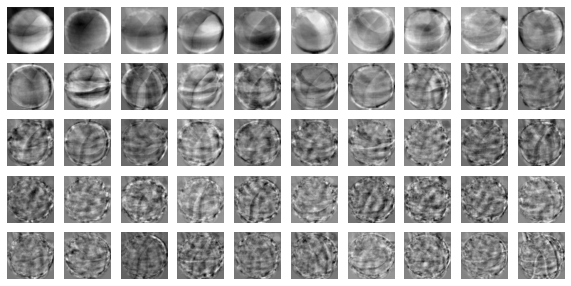

In [5]:
draw_fruits(pca.components_.reshape(-1,100,100))

#원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것. 한편으로는 데이터셋에 있는 어떠 ㄴ특징을 잡아낸 것이라고도 생각할 수 있다.
#주성분 찾았으므로 원본데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있따.
#이는 마치 원본 데이터를 각 주성분으로 분해하는 것으로 생각할 수도 있음

In [6]:
print(fruits_2d.shape)
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


In [7]:
#원본 데이터 재구성

#축소과정에서 어느정도 손실이 발생할 수 밖에 없다. 하지만 최대한 분산이 큰 방향으로 데이터를 투영했으므로 원본 데이터를 상당 부분 재구성할 수 있따.
#PCA 클래스는 이를 위해 inverse_transform()메소드를 제공한다.

fruits_inverse=pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


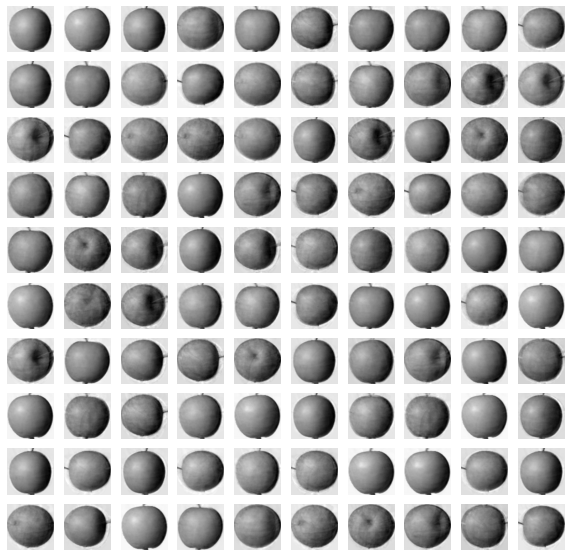

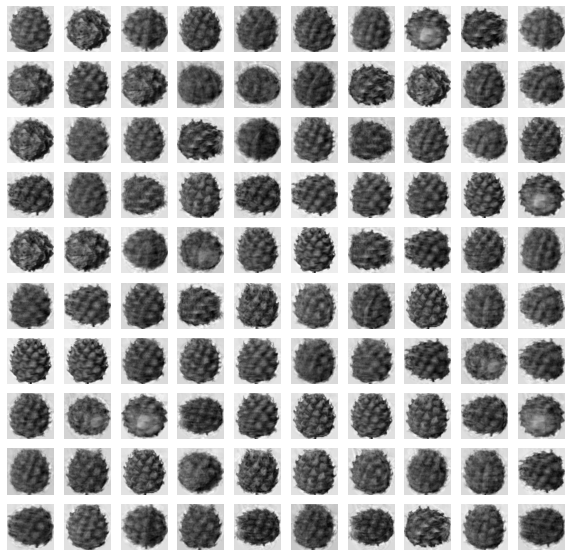

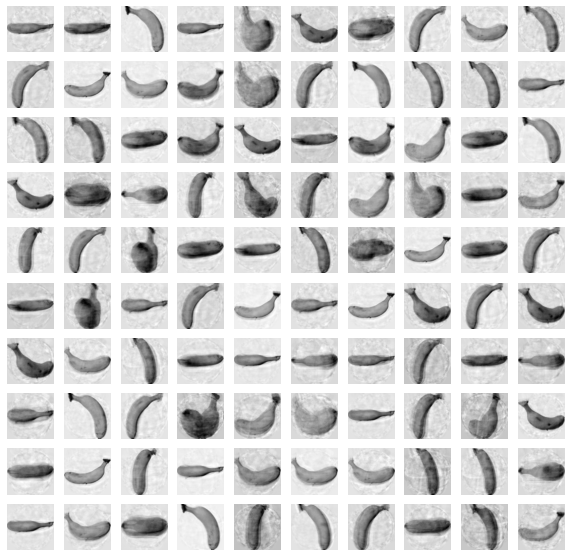

In [8]:
fruits_reconstruct=fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

In [9]:
#설명된 분산

#주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한값!!!!!!
#PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어 있다. 

In [ ]:
#당연히 첫번째 주성분의 설명된 분산이 가장 크다. 이 분산비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산비율을 얻을 수 있다.


In [10]:
print(np.sum(pca.explained_variance_ratio_))

#92%가 넘는 분산을 유지하고 있구만요

0.9215352593419865


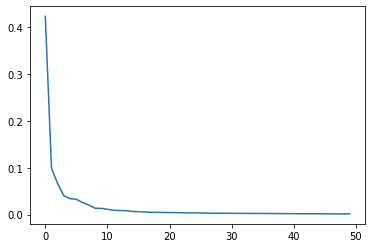

In [11]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

#처음 10개의 주성분이 대부분의 분산을 표현하고 있구나

In [ ]:
#pca로 차원 축소된 데이터를 사용하여 지도학습 모델을 훈련해볼게

#어떤 차이가 있는지 확인할 것!


In [12]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
#타깃값을 정해야하므로 사과0 파인애플1 바나나2로 할게
target=np.array([0]*100+[1]*100+[2]*100)

In [13]:
from sklearn.model_selection import cross_validate
scores=cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.0060816764831544


In [16]:
#애는 pca 사용한 예시
scores=cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

#훈련속도도 빨라졌네

1.0
0.030518531799316406


In [17]:
#n_components에 주성분의 개숙를 정했는데, 대신 원하는 설명된 분산의 비율을 입력할 수도 있다.

pca=PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=0.5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
print(pca.n_components_)

2


In [20]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)
#주성분이 2개이므로 변환된 데이터릐 크기가 (300,2)

(300, 2)


In [21]:
#교차검증의 결과는?
scores=cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

#2개만 사용했는데도 99%의 정확도를 달성

0.99
0.041116952896118164


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [22]:
from sklearn.cluster import KMeans

#차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾아볼 것
km=KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))


#클러스터는 각각 91,99,110개를 포함하고 있구나~

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


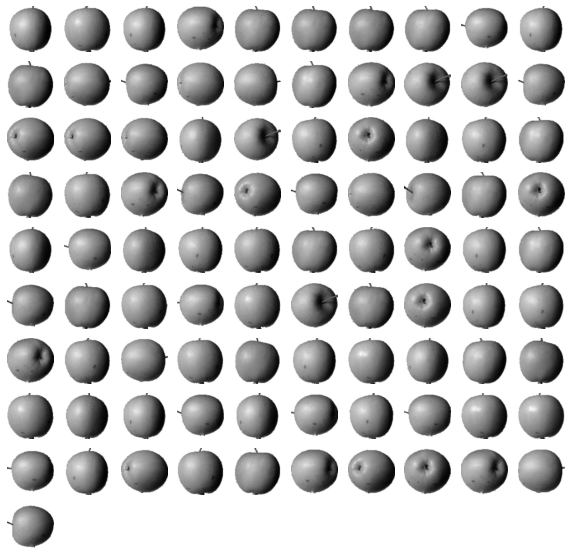

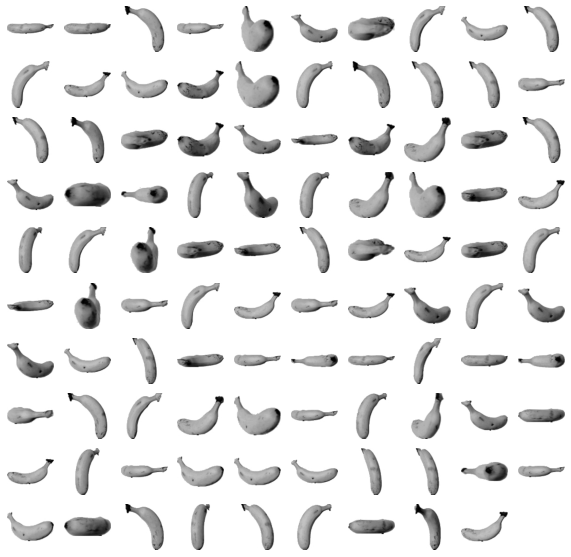

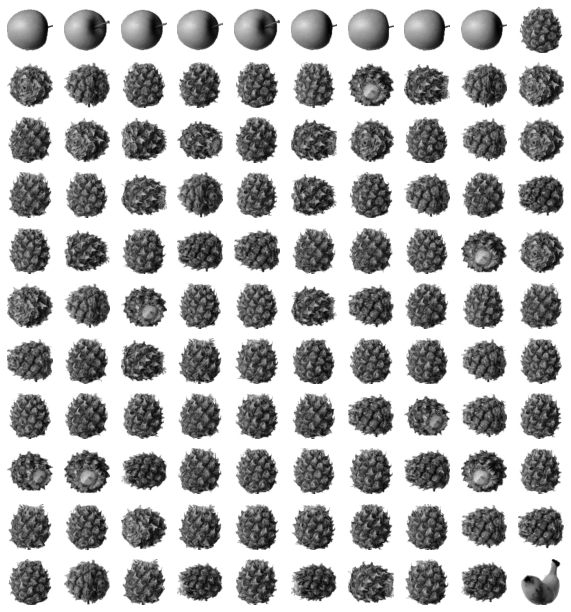

In [23]:
for label in range(3):
  draw_fruits(fruits[km.labels_==label])
  print('\n')

  #몇개의 사과가 파인애플에 들어가있음

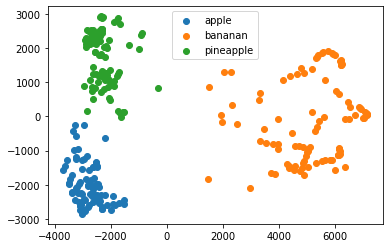

In [25]:
#훈련데이터의 차원을 줄이는 것의 장점은 시각화!
#차원을 좀 줄이면 화면에 출력하기 비교적 쉽다. pca 데이터는 2개의 특성이 있어서 2차원으로 표현할 수 있다.


#클러스터별로 산점도 그려보기
for label in range(3):
  data=fruits_pca[km.labels_==label]
  plt.scatter(data[:,0],data[:,1])
plt.legend(['apple','bananan','pineapple'])
plt.show()

#각 클러스터의 산점도가 아주 잘 구분되어서 2개만의 특성으로도 로지스틱회귀모델의 교차검증 점수가99%나 달성한 것
#근데 사과와 파인애플 클러스터의 경계가 가까워서 혼동을 일으키기 쉬울 것이다